<a href="https://colab.research.google.com/github/JHyunjun/SNU/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [175]:
%matplotlib inline #코드에서 matplotlib을 확인할 수 있게하는 것
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

UsageError: unrecognized arguments: #코드에서 matplotlib을 확인할 수 있게하는 것


In [176]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Fire and Theft

In [177]:
# Single Linear Regression
#화재와 범죄율의 관계를 확인, x:1000명당 화재율, y:1000가구당 범죄율
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/SNU_AI-Master/week1/220707/fire_theft.csv')
df.head()


,X,Y
0,6.2,29
1,9.5,44
2,10.5,36
3,7.7,37
4,8.6,53


In [178]:
x_o = df['X'].values #전체가 하나의 벡터 [~~~~]  #.values : numpy array배열로 바꿈(1차원)
print(x_o.shape)
x = df['X'].values.reshape([-1, 1]) #한개씩 각각 벡터 [~],[~],... 
#Reshape은 1차원짜리 Array를 2차원 Array로 바꾸어줌
y = df['Y'].values


(42,)


In [179]:
# Fit linear model
reg = LinearRegression().fit(x, y)
print('Coefficient:\n', reg.coef_) #y=ax+b에서 a가 coefficient, b가 Interception
print('Intercept:\n', reg.intercept_)

Coefficient:
 [1.313456]
Intercept:
 16.99515723273957


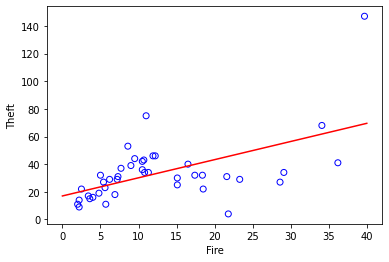

In [180]:
# Draw a scatter plot
plt.scatter(x, y, marker='o', edgecolors='b', facecolor='none')

# Draw the linear regression model
coef = reg.coef_
intercept = reg.intercept_
line_x = np.linspace(0, 40, 100)
line_y = coef[0] * line_x + intercept
plt.plot(line_x, line_y, c='red')

plt.xlabel('Fire')
plt.ylabel('Theft')
plt.show()

In [181]:
# Multiple Linear Regression
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/SNU_AI-Master/week1/220707/winequality_red.csv', sep=';')
df.head()
print(df.shape) #[1599,12]

(1599, 12)


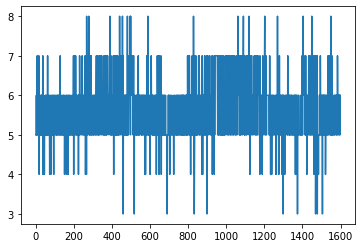

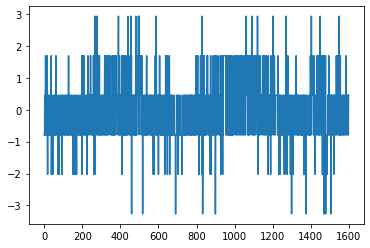

In [182]:
x = df.iloc[:,:-1].values #앞에 11개가 input
y = df['quality'].values.reshape([-1, 1])
plt.show()
plt.plot(y)
y_ss = StandardScaler().fit_transform(y)
plt.show()
plt.plot(y_ss)

In [183]:
# Data-Preprocessing
from sklearn.preprocessing import StandardScaler
print(x)
sc = StandardScaler().fit(x)
x = sc.transform(x) #평균이 1이고 표준편차가 1인 Normal Distribution으로 Normalizing
#y = StandardScaler().fit_transform(y)
print(x.shape)
print(x)

[[ 7.4    0.7    0.    ...  3.51   0.56   9.4  ]
 [ 7.8    0.88   0.    ...  3.2    0.68   9.8  ]
 [ 7.8    0.76   0.04  ...  3.26   0.65   9.8  ]
 ...
 [ 6.3    0.51   0.13  ...  3.42   0.75  11.   ]
 [ 5.9    0.645  0.12  ...  3.57   0.71  10.2  ]
 [ 6.     0.31   0.47  ...  3.39   0.66  11.   ]]
(1599, 11)
[[-0.52835961  0.96187667 -1.39147228 ...  1.28864292 -0.57920652
  -0.96024611]
 [-0.29854743  1.96744245 -1.39147228 ... -0.7199333   0.1289504
  -0.58477711]
 [-0.29854743  1.29706527 -1.18607043 ... -0.33117661 -0.04808883
  -0.58477711]
 ...
 [-1.1603431  -0.09955388 -0.72391627 ...  0.70550789  0.54204194
   0.54162988]
 [-1.39015528  0.65462046 -0.77526673 ...  1.6773996   0.30598963
  -0.20930812]
 [-1.33270223 -1.21684919  1.02199944 ...  0.51112954  0.01092425
   0.54162988]]


In [184]:
# Fit linear model
reg = LinearRegression().fit(x, y)
print('Coefficient:\n', reg.coef_) #[1,11]
print('Intercept:\n', reg.intercept_, reg.intercept_.shape) # [1,]

Coefficient:
 [[ 0.04349735 -0.19396667 -0.03555254  0.02301871 -0.08818339  0.04560596
  -0.10735582 -0.03373717 -0.06384247  0.1552765   0.29424288]]
Intercept:
 [5.63602251] (1,)


## Wine Quality Prediction

In [192]:
from sklearn.model_selection import KFold

n_splits = 10
kf = KFold(n_splits)
rmse = 0
count=0
rmse2 = 0

reg_2 = LinearRegression()

for train_idx, valid_idx in kf.split(x): #10등분을했기에 10번돈다.
    x_train, x_valid = x[train_idx], x[valid_idx] #x_train:[1439,11], x_valid:[160,11]
    y_train, y_valid = y[train_idx], y[valid_idx]
    reg1 = LinearRegression().fit(x_train, y_train)
    reg1_predict = reg1.predict(x_valid)
    error = reg1_predict - y_valid

    reg2 = reg_2.fit(x_train,y_train)
    ref2 = reg_2.predict(x_valid)
    error2 = ref2 - y_valid

    rmse += np.sqrt(np.sum(error**2)/len(y_valid)) #10번에 대한 RMSE의 평균
    rmse2 += np.sqrt(np.sum(error2**2)/len(y_valid))
pass

print('Coefficient:\n', reg1.coef_) #y=ax+b에서 a가 coefficient, b가 Interception
print('Intercept:\n', reg1.intercept_)

print(rmse/n_splits)
print(rmse2/n_splits)


Coefficient:
 [[ 0.05125745 -0.18728028 -0.02439727  0.02381672 -0.08344703  0.03961133
  -0.11578455 -0.04257436 -0.03951569  0.15011286  0.28480593]]
Intercept:
 [5.64517785]
0.6586297547378714
0.6586297547378714


In [186]:
# My Check
wine = np.array([7.5, 0.9, 3.5, 8.0, -3.4, 0.1, -0.5, 1.1, 7.7, 3.0, 6.1]).reshape(-1,1)
print("wine : ",wine)
wine = wine.T
wine = sc.transform(wine) #fit을 안하는 이유 : 이전에 한걸 그대로 쓰기 때문에
print("After Transforming : ",wine)
print(wine.shape)
wine_predict = reg.predict(wine)
print(wine_predict)

wine :  [[ 7.5]
 [ 0.9]
 [ 3.5]
 [ 8. ]
 [-3.4]
 [ 0.1]
 [-0.5]
 [ 1.1]
 [ 7.7]
 [ 3. ]
 [ 6.1]]
After Transforming :  [[ -0.47090657   2.07917199  16.58118945   3.87459697 -74.12164417
   -1.50856789  -1.42824206  54.72567407  28.43681819  13.81998424
   -4.05786532]]
(1, 11)
[[8.62291644]]
